<a href="https://colab.research.google.com/github/hari-hashing/Tensorflow_Learning/blob/main/Classify_images_of_clothing_Using_Tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classify images of clothing Using Tensorflow

In [1]:
# Importing Tensorflow

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)


2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels ), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_labels
unique_train_labels = set(train_labels)
print(unique_train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [4]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(train_labels)

60000

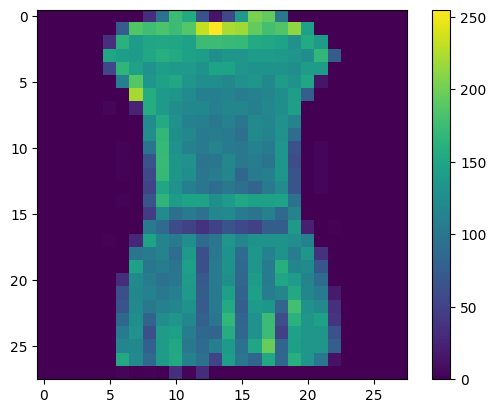

In [8]:
plt.imshow(train_images[3])
plt.colorbar()
plt.show()
# by default there is no grid show

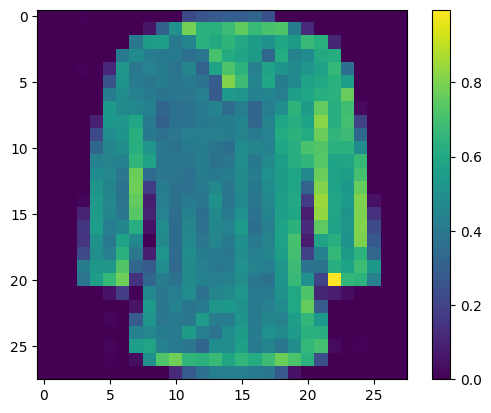

In [9]:
# We have to scale these values to 0 to 1 from 0 to 255 before feeding them to neural network
# so we have to preproccess the training and the testing images to change the pixel values from 0 - 255 to 0-1
# by dividing by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.imshow(test_images[4])
plt.colorbar()
plt.show()

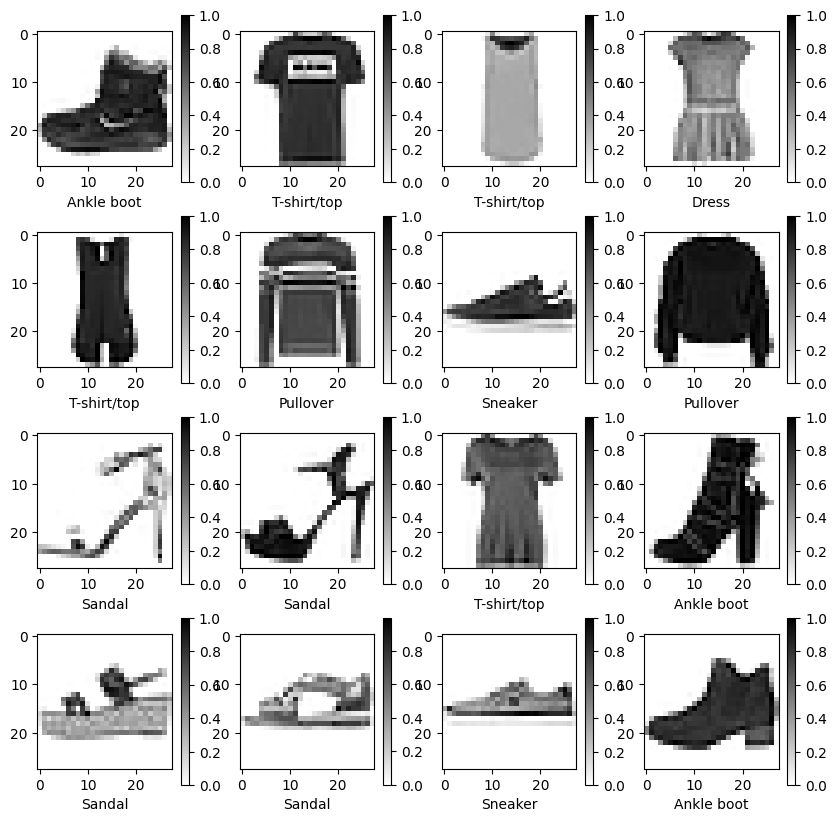

In [10]:
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.colorbar()
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# Building the Model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
# Compiling the model by giving the optimizer and the loass and metric for accuracy

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [17]:
model.fit(train_images , train_labels, epochs = 12 , verbose = 1)

Epoch 1/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2980 - accuracy: 0.8898
Epoch 2/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2841 - accuracy: 0.8943
Epoch 3/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2704 - accuracy: 0.9000
Epoch 4/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2607 - accuracy: 0.9026
Epoch 5/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2487 - accuracy: 0.9074
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2398 - accuracy: 0.9100
Epoch 7/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2342 - accuracy: 0.9126
Epoch 8/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2248 - accuracy: 0.9157
Epoch 9/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2185 - accuracy: 0.9175
Epoch 10/12
1875/1875 [==============================] - 11s 6ms/step - loss: 

In [18]:
# Testing on the test data and labels along with the seeing the test accuracy and loss

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc, '\nTest Loss:', test_loss)

313/313 - 1s - loss: 0.3457 - accuracy: 0.8867 - 844ms/epoch - 3ms/step

Test accuracy: 0.8866999745368958 
Test Loss: 0.34566619992256165


In [19]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [21]:
predictions[0]

array([1.4219619e-08, 1.2308866e-09, 2.2874596e-09, 1.0702932e-11,
       7.6480056e-08, 9.2721899e-04, 1.6943684e-07, 8.0286097e-03,
       2.9063753e-07, 9.9104375e-01], dtype=float32)

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.xticks(range(10))
  # to keep the y axis blank
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

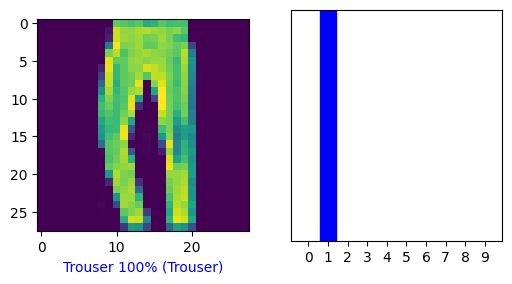

In [30]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

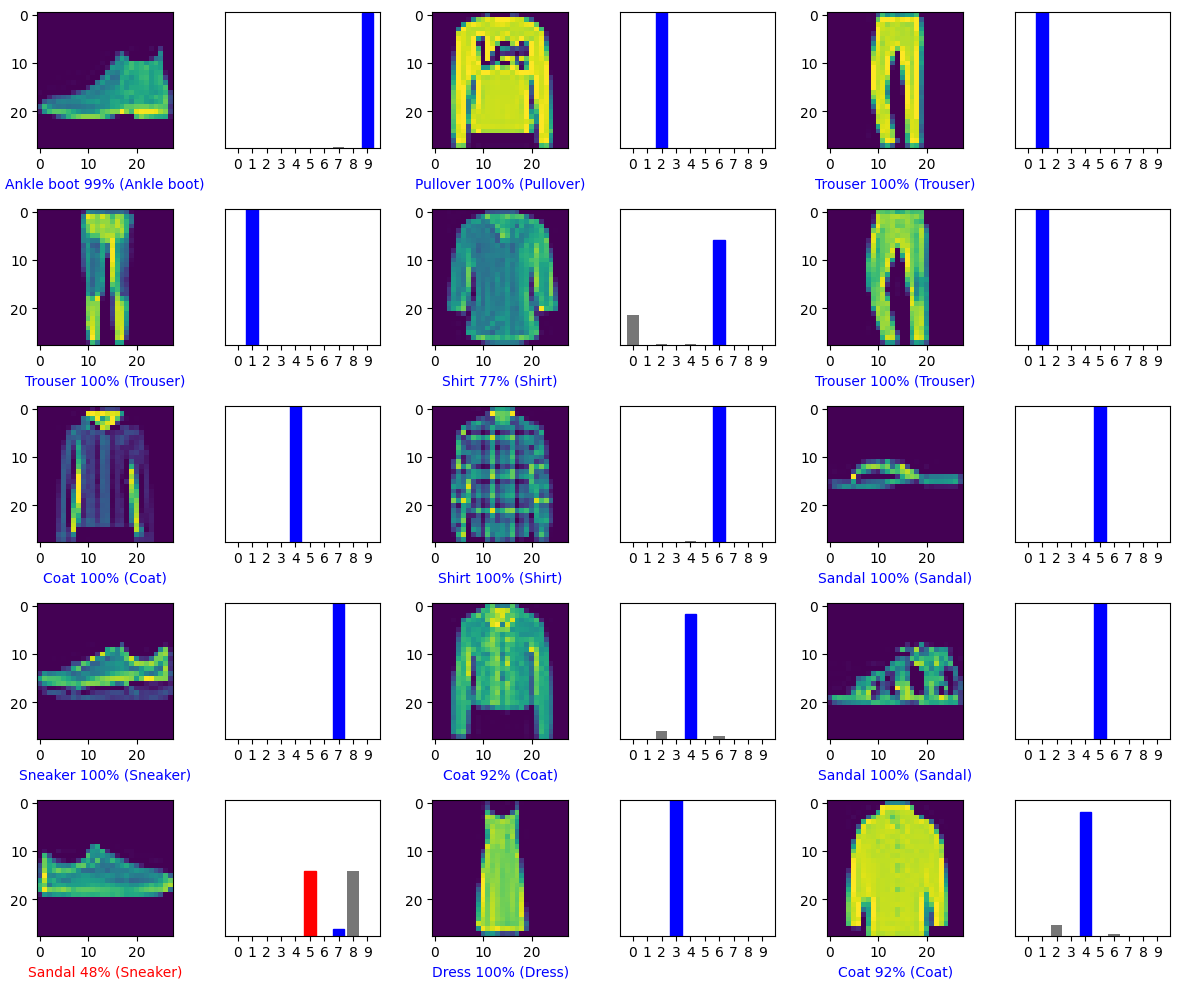

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
New Shape :  (1, 28, 28)


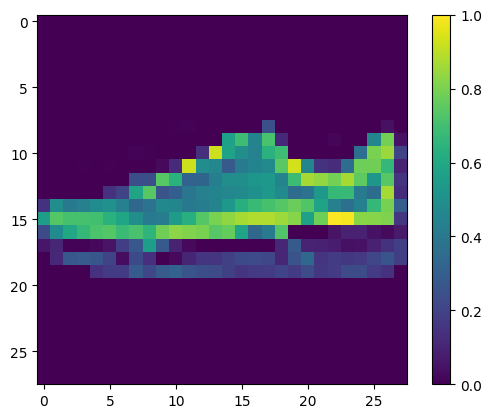

In [60]:
# To make prediction for a single image
# But keras is optimized to work on a batch data and not on a single value thus
# we have to make a numpy array for getting a prediction from the model
img = test_images[9]
print(img.shape)
plt.imshow(img)
plt.colorbar()
plt.show

img = np.expand_dims(img,0)
print('New Shape : ',img.shape)

In [61]:

predictions = probability_model.predict(img)
print(predictions)

1/1 [==============================] - 0s 23ms/step
[[1.1104119e-09 4.9402180e-11 1.5126881e-11 1.1203142e-10 3.4194073e-10
  6.0160573e-07 2.9078294e-11 9.9999917e-01 1.5539715e-08 2.3012261e-07]]


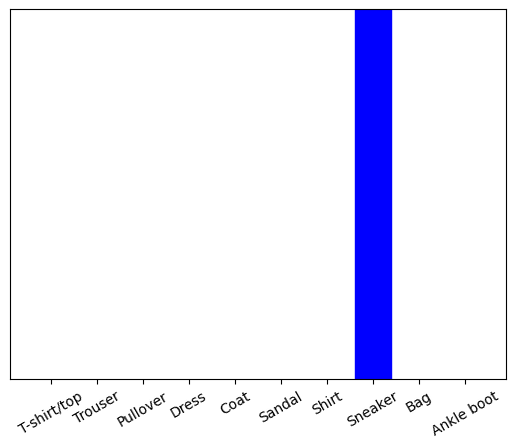

In [64]:
plot_value_array(9, predictions[0], test_labels)
plt.xticks(range(10), class_names , rotation = 30)
plt.show()